## Question 1

- a) Refer to figure 1 on the linear graphs
- b) Weight for W is 1.149 on the linear graphs
- c) See figure 2 on the linear graphs
- d) The prediction is as good as possible for a linear function - straight through the middle of the data. Obviously this won't be a good prediction because it cannot fit the data which looks more like a sin function. However, I also tried gradient descent on the function: math.sin(X*X + X) * 1/X, which ended up fitting the curve better. You can also see at the top, in polynomial (section 2), that a 17th degree polynomial almost can fit the data better. Still, none of my predictions correctly model the function.
 

## Question 2

- a) The gradient weight is the same, ~1.15
- b) Both of the weights are the same, as you can see the best fitting lines are the same
- c) See figure 1 on the linear graphs for the one step solution graph
- d) The performance is identical, except training is constant in the one-step solution. In Figure 3, you can see the error over iterations, and that gradient descent took around 500 iterations to converge. In the other function that I tried, math.sin(X*X + X) * 1/X, gradient descent produces a different and somewhat more representative result than the one step solution. In this case, gradient descent performs better.


## Questions: Neural Network for Regression

- 1) It looks like with 5 hidden layer with 500 neurons each, the output only is accurate for the first certain set of datapoints. At a certain point, the neural network is no longer able to model the output of the dataset. It is obviously quite a bit better than linear regression models, but substantially worse than non linear regression models (like sin or polynomial).

- 2) In section 4, below, you can see the output is: At index 275 predicted 584.6208403857938 , actually was 585.0. This is a very good prediction! The mean error is 150.25  and standard deviation of the error is 185.15. This is a surprising result, but if you take a look at the histogram of the error in section 4 it makes sense. Some outliers are affecting the standard deviation.

In [1]:
import pandas as pd

In [334]:
with open("regression_x_t.txt") as file:
    lines = file.readlines()

lines = map(str.strip, lines)
lines = map(str.split, lines)
lines = [(float(x), float(y)) for x, y in lines]

In [3]:
X, Y = zip(*lines)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = [np.array(data).reshape(-1, 1) for data in train_test_split(X, Y, test_size=0.2)]

### Linear Regression (section 1)

Linear Best Fit


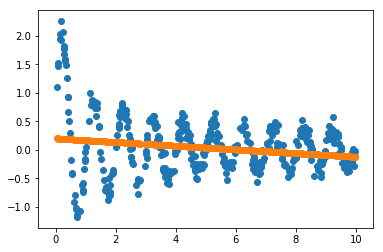

In [231]:
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("Linear Best Fit")
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

### Polynomial (section 2)

Polynomial 17th degree best fit


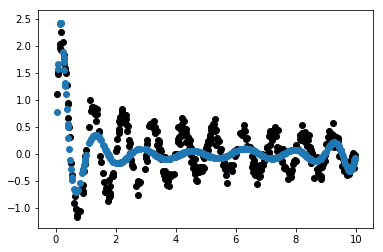

In [244]:
z = np.polyfit(X_train.reshape(-1), y_train.reshape(-1), 17)
p = np.poly1d(z)

plt.scatter(X_test, y_test, color='black')

y_pred = p(X_test)

plt.scatter(X_test, y_pred)
print("Polynomial 17th degree best fit")


### Gradient Descent (section 3)


-------------------- Running on Sin --------------------
Gradient Weights:  [[-0.00970356]]
One step results: Figure 1


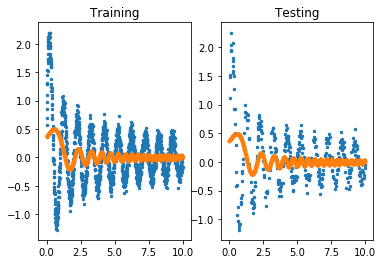

Gradient Descent results: Figure 2


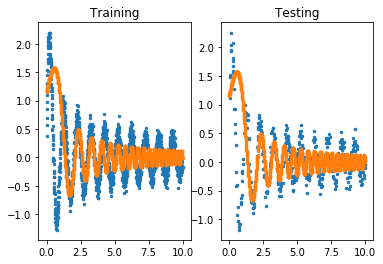

Error in training: Figure 3

-------------------- Running on Linear --------------------
Gradient Weights:  [[1.1496686]]
One step results: Figure 1


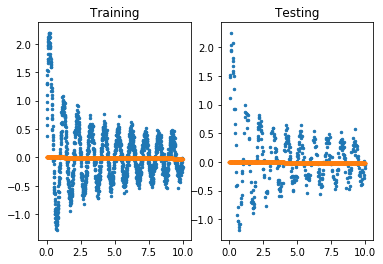

Gradient Descent results: Figure 2


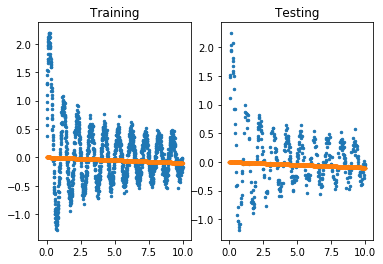

Error in training: Figure 3


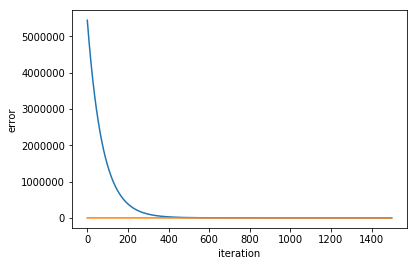

In [222]:
def calculate_error(X, Y, W):
    err = (fit(X, W) - Y) ** 2
    return fit(np.transpose(err), err)

def gd(X, Y, W):
    global STEP_SIZE, ITERS

    C = []
    for i in range(ITERS):
        W -= STEP_SIZE/X.shape[0] * fit(X.T, fit(X, W) - Y)
        C.append(calculate_error(X, Y, W))
        
    return W, C


def map_func(func, X):
    X = np.asarray(list(map(func, X)))
    X.resize((len(X), 1))
    return X

def fit(X, weights):
    return np.dot(X, weights)


def plot(X, Y, fnX):
    global X_test, y_test
    plt.subplot(121)
    plt.scatter(X, Y, s=6)
    plt.scatter(X, fnX, s=6)
    plt.title(f"Training")
    
    plt.subplot(122)
    plt.scatter(X_test, y_test, s=6)
    plt.scatter(X, fnX, s=6)
    plt.title(f"Testing")
    plt.show()
    
def plot_cost(cst, err):
    plt.plot(range(len(cst)), cst)
    plt.plot(range(len(cst)), [err for i in range(len(cst))])
    plt.xlabel("iteration")
    plt.ylabel("error")
    

def one_step(X, Y):
    return fit(np.linalg.inv(fit(X.T, X)), fit(X.T, Y))
    
def solution(func):
    global X_train, y_train, X_test, y_test
    X, Y, X_test, Y_test = X_train, y_train, X_test, y_test
    theta = np.random.randn(1, 1)
    
    out = map_func(func, X)
    out_test = map_func(func, X_test)
    
    gradient_weights, costs = gd(out, Y, theta)
    print("Gradient Weights: ", gw)
    error_test = calculate_error(out_test, Y_test, gradient_weights)
    
    w = one_step(out, Y) 
    
    err = calculate_error(out_test, Y_test, w)
    
    # One step
    print("One step results: Figure 1")
    plot(X, Y, fit(out, w))

    print("Gradient Descent results: Figure 2")
    plot(X, Y, fit(out, gradient_weights))
    
    print("Error in training: Figure 3")
    plot_cost(costs, err)
    return gradient_weights
    
import math
def sin(X):
    return math.sin(X*X + X) * 1/X

def linear(X):
    return X


STEP_SIZE = .0001
ITERS = 1500
    
print("-" * 20, 'Running on Sin', "-" * 20)
gw = solution(sin)

print()
    
print("-" * 20, 'Running on Linear', "-" * 20)
gw = solution(linear)



## Neural Network

In [273]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=[500] * 5)
clf.fit(X_train, y_train.reshape(-1))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[500, 500, 500, 500, 500],
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [274]:
y_pred = clf.predict(X_test)

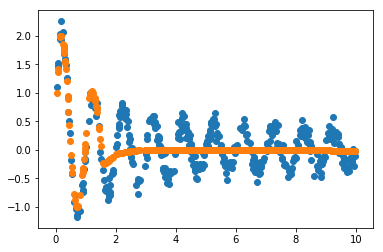

In [275]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

In [298]:
def get_lines(filename):
    with open(filename) as file:
        lines = file.readlines()

    lines = map(str.strip, lines)
    lines = map(str.split, lines)
    lines = [[float(num) for num in line] for line in lines]
    return lines

def data_from(filename):
    lines = get_lines(filename)
    test = [[line.pop()] for line in lines]
    return np.array(lines), np.array(test)

xtrain, ytrain = data_from('Reg_Train.txt')
xtest, ytest = data_from('Reg_Test.txt')

array([[ 1.],
       [ 1.],
       [15.],
       ...,
       [ 1.],
       [14.],
       [19.]])

In [302]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=[200] * 5)
clf.fit(xtrain, ytrain.reshape(-1))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[200, 200, 200, 200, 200],
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [307]:
y_pred = clf.predict(xtest)

In [311]:
y_real = ytest.reshape(-1)

### NN Analysis (Section 4)

At index 275 predicted 584.6208403857938 , actually was 585.0
Mean is  150.25011425103273 Std is 185.15772454090236


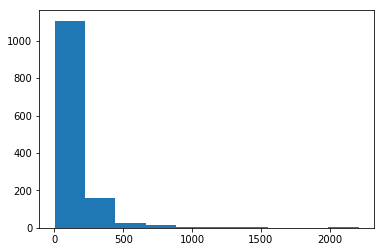

In [333]:
import math

def find_best_prediction(y_pred, y_truth):
    """ returns index of best predicted value """
    best, error = None, math.inf
    
    for i, (pred, truth) in enumerate(zip(y_pred, y_truth)):
        err = abs(pred - truth)
        if err < error:
            best = i
            error = err
            
    return best

def find_avg_error(y_pred, y_truth):
    error = np.subtract(y_pred, y_truth)
    error = list(map(abs, error))
    plt.hist(error)
    return np.mean(error), np.std(error)

index = find_best_prediction(y_pred, y_real)
print("At index", index, "predicted",  y_pred[275], ', actually was', y_real[275])

mean, std = find_avg_error(y_pred, y_real)
print("Mean is ", mean, "Std is", std)